# Лабораторна робота № 2

**Тема.** Використання рекурентного аналізу для моделювання і прогнозування 
нелінійних динамічних властивостей складних систем.

**Мета.** Навчитися інструментарію нелінійної динаміки, який відноситься до 
рекурентних властивостей нестаціонарних динамічних рядів. 

## Теоретичні відомості

Дослідження складних систем, як природних, так і штучних, показали, що в їх основі лежать нелінійні процеси, ретельне вивчення яких необхідне для розуміння і моделювання складних систем. У останні десятиліття набір традиційних (лінійних) методик дослідження був істотно розширений нелінійними методами, одержаними з теорії нелінійної динаміки і хаосу; багато досліджень були присвячені оцінці нелінійних характеристик і властивостей процесів, що протікають в природі (скейлінг, фрактальна розмірність). Проте більшість методів нелінійного аналізу вимагає або достатньо довгих, або стаціонарних рядів даних, які досить важко одержати з природи. Більш того, було показано, що дані методи дають задовільні результати для моделей реальних систем, що ідеалізуються. Ці чинники вимагали розробки нових методик нелінійного аналізу даних.

Стан природних або штучних систем, як правило, змінюється в часі. Вивчення цих, часто складних, процесів --- важлива задача в багатьох дисциплінах, дозволяє зрозуміти і описати їх суть, наприклад, для прогнозування стану на деякий час в майбутнє. Метою таких досліджень є знаходження математичних моделей, які б достатньо відповідали реальним процесам і могли б бути використані для розв’язання поставлених задач.

Розглянемо ідею і коротко теорію рекурентного аналізу, наведемо деякі приклади, розглянемо його можливі області застосування при аналізі і прогнозування складних фінансово-економічних систем. 

### Фазовий простір та його реконструкція

Стан системи описується її змінними стану

$$
x^1(t),x^2(t),...,x^d(t)
$$

де верхній індекс --- номер змінної. Набір із $d$ змінних стану у момент часу $t$ складає вектор стану $\vec x(t)$ в $d$-вимірному фазовому просторі. Даний вектор переміщається в часі в напрямі,визначуваному його вектором швидкості:

$$
\dot{\vec x}(t)=\partial_t\vec x(t)=\vec F(t)
$$

Послідовність векторів $\vec x(t)$ утворює траєкторію у фазовому просторі, причому поле швидкості $\vec F$ дотичне до цієї траєкторії. Еволюція траєкторії описує динаміку системи і її атрактор. Знаючи $\vec F$, можна одержати інформацію про стан системи в момент $t$ шляхом інтегрування виразу. Оскільки форма траєкторії дозволяє судити про характер процесу (періодичні або хаотичні процеси мають характерні фазові портрети), то для визначення стану системи не обов'язково проводити інтегрування, достатньо побудувати графічне відображення траєкторії.

При дослідженні складних систем часто немає інформації про всі змінні стану, або не все з них можливо виміряти. Як правило, є єдине спостереження, проведене через дискретний часовий інтервал $\Delta t$. Таким чином, вимірювання записуються у вигляді ряду $u_i(t)$ i , де $t=i\cdot \Delta t$. Інтервал $\Delta t$ може бути постійним, проте це не завжди можливо і створює проблеми для застосування стандартних методів аналізу даних, що вимагають рівномірної шкали спостережень.

Взаємодії і їх кількість в складних системах такі, що навіть по одній змінній стану можна судити про динаміку всієї системи в цілому (даний факт був встановлений групою американських учених при вивченні турбулентності). Таким чином, еквівалентна фазова траєкторія, що зберігає структури оригінальної фазової траєкторії, може бути відновлена з одного спостереження або часового ряду за теоремою Такенса (Takens) методом часових затримок:

$$
\widehat{\vec x}(t)=(u_i,u_{i+\tau},...,u_{i+(m-1)\tau})
$$

де $m$ --- розмірність вкладення, $\tau$ --- часова затримка (реальна часова затримка визначається як $\tau \cdot \Delta t$). Топологічні структури відновленої траєкторії зберігаються, якщо $m \geq 2 \cdot d+1$, де $d$ --- розмірність атрактора. На практиці більшості випадків атрактор може бути відновлений і при $m \leq 2d$. Затримка, як правило, вибирається апріорно.

Існує кілька підходів до вибору мінімально достатньої розмірності $m$, крім аналітичного. Високу ефективність показали методи, засновані на концепції фальшивих найближчих точок (false nearest neighbours, FNN). Суть її заключається у тому, що при зменшенні розмірності вкладення відбувається збільшення кількості фальшивих точок, що потрапляють в околицю будь-якої точки фазового простору. Звідси витікає простий метод --- визначення кількості FNN як функції від розмірності. Існують і інші методи, засновані на цій концепції --- наприклад, визначення відносин відстаней між одними і тими ж сусідніми точками при різних $m$. Розмірність атрактора також може бути визначена за допомогою крос-кореляційних сум. 

::: {#fig-recurrence layout-ncol=2"}

![](Images\lab_2\2_1.jpg){width=45%}
![](Images\lab_2\2_2.jpg){width=45%}

Відрізок траєкторії у фазовому просторі системи Рьослера $i$ (a); відповідний рекурентний графік (b). Вектор фазового простору в точці $j$, який потрапляє в околицю (сіре коло в (a)) заданого вектора фазового простору вектора в точці $i$ вважається точкою рекурентності (чорна точка на траєкторії в (a)). Вона позначається чорною точкою на рекурентній діаграмі у позиції $(i, j)$. Вектор фазового простору за межами околу (порожнє коло в (a)) призводить до білої точки в рекурентній діаграмі

:::

### Рекурентний аналіз

Процесам в природі властива яскраво виражена рекурентна поведінка, така, як періодичність або іррегулярна циклічність. Більш того, рекурентність (повторюваність) станів в значенні проходження подальшої траєкторії достатньо близько до попередньої є фундаментальною властивістю дисипативних динамічних систем. Ця властивість була відмічена ще в 80-х роках XIX століття французьким математиком Пуанкаре (Poincare) і згодом сформульовано у вигляді "теореми рекурентності", опублікованої в 1890 р.:

:::{.callout-note}
## Примітка

**Якщо система зводить свою динаміку до обмеженої підмножини фазового простору, то система майже напевно, тобто з вірогідністю, практично рівною 1, скільки завгодно близько повертається до якого-небудь спочатку заданого режиму.**
:::

Суть цієї фундаментальної властивості у тому, що, не дивлячись на те, що навіть саме мале збурення в складній динамічній системі може привести систему до експоненціального відхилення від її стану, через деякий час система прагне повернутися до стану, деяким чином близького до попереднього, і проходить при цьому подібні етапи еволюції.

Переконатися в цьому можна за допомогою графічного зображення траєкторії системи у фазовому просторі. Проте можливості такого аналізу сильно обмежені. Як правило, розмірність фазового простору складної динамічної системи більша трьох, що
робить практично незручним його розгляд напряму; єдина можливість --- проекції в дво- і тривимірні простори, що часто не дає вірного уявлення про фазовий портрет.

У 1987 р. Екман (Eckmann) і співавтори запропонували спосіб відображення $m$-вимірної фазової траєкторії станів системи $\vec x(t)$ завдовжки $N$ на двовимірну квадратну двійкову матрицю розміром $N \times N$ , в якій 1 (чорна точка) відповідає повторенню стану при деякому часі $i$ в деякий інший час $j$, а обидві координатні осі є осями часу. Таке представлення було назване рекурентною картою або діаграмою (recurrence plot, RP), оскільки воно фіксує інформацію про рекурентну поведінку системи.

Математично вищесказане описується як

$$
R_{i,j}^{m,\varepsilon_i}=\Theta(\varepsilon_i-\| \vec x_i - \vec x_j \|), \quad \vec x \in \Re^m, \quad i, j=1,...,N,
$$

де $N$ --- кількість даних станів, $x_i, \varepsilon_i$ --- розмір околиці точки $\vec x$ у момент $i$, $\| \cdot \|$ --- норма і $\Theta(\cdot)$ --- функція Хевісайда.

Непрактично і, як правило, неможливо знайти повну рекурентність у значенні $\vec x_i \equiv \vec x_j$ (стан динамічної, а особливо --- хаотичної системи не повторюється повністю еквівалентно початковому стану, а підходить до нього скільки завгодно близько). Таким чином, рекурентність визначається як достатня близькість стану $\vec x_j$ до стану $\vec x_i$. Іншими словами, рекурентними є стани $\vec x_j$, які потрапляють в $m$-вимірну околицю з радіусом $\varepsilon_i$ і центром в $\vec x_i$. Ці точки $\vec x_j$ називаються **рекурентними точками** (recurrence points).

Оскільки $R_{i,i}=1$, $i=1,...,N$ за визначенням, то рекурентна діаграма завжди міститьчорну діагональну лінію --- лінію ідентичності (line of identity, LOI) під кутом $\pi/4$ до осей координат. Довільно узята рекурентна точка не несе якої-небудь корисної інформації про стани в часи $i$ і $j$. Тільки вся сукупність рекурентних точок дозволяє відновити властивості системи.

Зовнішній вигляд рекурентної діаграми дозволяє судити про характер процесів, які протікають в системі, наявності і впливі шуму, станів повторення і завмирання (ламінарності), здійсненні в ході еволюції системи різких змін стану (екстремальних подій).

::: {#fig-recurrence-types layout-nrows=5}

![однорідна топологія](Images\lab_2\2_3.jpg)
![дрейф](Images\lab_2\2_4.jpg)
![Осцилююча поведінка системи](Images\lab_2\2_5.jpg)
![Контрастна топологія](Images\lab_2\2_6.jpg)
![Ламінарність процесу](Images\lab_2\2_7.jpg)

Типові динамічні ряди і їх рекурентні карти

:::

### Аналіз діаграм

Очевидно, що процеси різної поведінки даватимуть рекурентні діаграми з різним рисунком. Таким чином, візуальна оцінка діаграм може дати уявлення про еволюцію досліджуваної траєкторії. Виділяють два основних класи структури зображення: **топологія** (*typology*), що представляється крупномасштабними структурами, і **текстура** (*texture*), *що формується дрібномасштабними структурами*.

Топологія дає загальне уявлення про характер процесу. Виділяють чотири основні класи:

- **однорідні** рекурентні діаграми типові для стаціонарних і автономних систем, в яких час релаксації малий у порівнянні з довжиною ряду;
- **періодичні** структури, що повторюються (діагональні лінії, узори у шаховому порядку) відповідають різним осцилюючим системам з періодичністю в динаміці;
- **дрейф** відповідає системам з параметрами, що поволі змінюються, що робить білими лівий верхній і правий нижній кути рекурентної діаграми;
- **різкі зміни** в динаміці системи, рівно як і екстремальні ситуації, обумовлюють появу білих областей або смуг.

Рекурентні діаграми **спрощують** виявлення екстремальних і рідкісних подій.

::: {#fig-recurrence-diagrams layout-ncol=4}

![](Images\lab_2\type_of_rec_a.png){#homogeneous width=35%}

![](Images\lab_2\type_of_rec_b.png){#periodic width=35%}

![](Images\lab_2\type_of_rec_c.png){#drift width=35%}

![](Images\lab_2\type_of_rec_d.png){#disrupted width=35%}

Характернi топологiї рекурентних дiаграм: (а) --- однорiдна (нормально розподiлений шум); (b) --- перiодична (генератор Ван дер Поля); (c) --- дрейф (вiдображення Iкеди з накладеною послiдовнiстю, що лiнiйно росте); (d) --- контрастнi областi або смуги (узагальнений броунiвський рух)

:::

Докладний розгляд рекурентних діаграм дозволяє виявити дрібномасштабні структури --- текстуру, яка складається з простих точок, діагональних, горизонтальних і вертикальних ліній. Комбінації вертикальних і горизонтальних ліній формують прямокутні кластери точок:

- ***самотні***, окремо розташовані рекурентні точки з'являються в тому разі, коли відповідні стани рідкісні, або нестійкі в часі, або викликані сильною флуктуацією. При цьому вони не є ознаками випадковості або шуму;
- ***діагональні лінії*** $R_{i+k, j+k}=1$ (при $k = 1...l$ де $l$ --- довжина діагональної лінії) з'являються у разі, коли сегмент траєкторії у фазовому просторі пролягає паралельно іншому сегменту, тобто траєкторія повторює саму себе, повертаючись в одну і ту ж область фазового простору у різний час. Довжина таких ліній визначається часом, протягом якого сегменти траєкторії залишаються паралельними; напрям (кут нахилу) ліній характеризує внутрішній час підпроцесів, відповідних даним сегментам траєкторії. Проходження ліній паралельно лінії ідентичності (під кутом $\pi/4$ до осей координат) свідчить про однаковий напрям сегментів траєкторії, перпендикулярно --- про протилежний («відображені» сегменти), що може також бути ознакою реконструкції фазового простору з невідповідною розмірністю вкладення. Нерегулярна поява діагональних ліній є ознакою хаотичного процесу;
- ***вертикальні (горизонтальні) лінії*** $R_{i, j+k}=1$ (при $k = 1...\upsilon$, де $\upsilon$ --- довжина вертикальної або горизонтальної лінії) виділяють проміжки часу, в котрі стан системи не змінюється або змінюється трохи (система як би «заморожена» на цей час), що є ознакою «ламінарних» станів.

::: {#fig-recurrence-concept}

![](Images\lab_2\recurrence_lines.png){width=10cm, height=10cm}

Основнi концепцiї рекурентного аналiзу. Вiдображена дiаграма рекурентностi базується на часовому ряду, що було реконструйовано до 11 реконструйованих векторiв, вiд $\vec{X}(0)$ до $\vec{X}(10)$. Видiлено дiагональну лiнiю довжиною $d = 3$, вертикальна лiнiя довжиною $v = 3$ i бiлу вертикальну лiнiю довжиною $w = 5$

:::

## Хід роботи

Спочатку побудуємо дво- та тривимірні фазові портрети як для модельних значень, так і для реальних. Використовуватимемо бібліотеки `neurokit2` для побудови атракторів та рекурентного аналізу.

### Процедура реконструкції фазового простору

Для побудови фазового портрету скористаємось методами `complexity_attractor()` та `complexity_embedding()` бібліотеки `neuralkit2`. Синтаксис `complexity_attractor()` виглядає наступним чином:

**`complexity_attractor(embedded='lorenz', alpha='time', color='last_dim', shadows=True, linewidth=1, **kwargs)`**

**Параметри**

- **embedded** (*Union[str, np.ndarray]*) --- результат функції `complexity_embedding()`. Також може бути рядком, наприклад, `"lorenz"` (атрактор Лоренца) або `"rossler"` (атрактор Рьосслера).
- **alpha** (*Union[str, float]*) --- прозорість ліній. Якщо `"time"`, то лінії будуть прозорими як функція часу (повільно).
- **color** (*str*) --- Колір графіку. Якщо `"last_dim"`, буде використано останній вимір (максимум 4-й) вбудованих даних, коли розмірність більша за 2. Корисно для візуалізації глибини (для 3-вимірного вбудовування), або четвертого виміру, але працюватиме це повільно.
- **shadows** (*bool*) --- якщо значення `True`, 2D-проекції буде додано до бокових сторін 3D-атрактора.
- **linewidth** (*float*) --- задає товщину лінії.
- **kwargs** --- До палітри кольорів (наприклад, `name="plasma"`) або до симулятора системи Лоренца передаються додаткові аргументи ключових слів, такі як `duration` (за замовчуванням = 100), `sampling_rate` (за замовчуванням = 10), `sigma` (за замовчуванням = 10), `beta` (за замовчуванням = 8/3), `rho` (за замовчуванням = 28).

Як вже зазначалося, побудова фазового простору, на основі якого і проводитиметься рекурентний аналіз, вимагає реконструкції. Виконати реконструкції фазового простору із одновимірного часового ряду можна із використанням *методу часових затримок*. 

Метод часових затримок є однією з ключових концепцій науки про складність, що ми використовуватимемо і в подальших лабораторних. Він базується на ідеї, що динамічна система може бути описана вектором чисел, який називається її "станом", що має на меті забезпечити повний опис системи в певний момент часу. Множина всіх можливих станів називається "простором станів".

Теорема Такенса (1981) припускає, що послідовність вимірювань динамічної системи містить у собі всю інформацію, необхідну для повної реконструкції простору станів. Метод часових затримок намагається визначити стан $s$ системи в певний момент часу $t$, шукаючи в минулій історії спостережень схожі стани, і, вивчаючи еволюцію схожих станів, виводити інформацію про майбутнє системи.

Як візуалізувати динаміку системи? Послідовність значень стану в часі називається траєкторією. Залежно від системи, різні траєкторії можуть еволюціонувати до спільної підмножини простору станів, яка називається атрактором. Наявність та поведінка атракторів дає інтуїтивне уявлення про досліджувану динамічну систему.

Одже, згідно Такенсу, ідея полягає в тому, щоб на основі одиничних вимірювань системи, отримати $m$-розмірні реконструйовані часові вкладення

$$
\vec{x}_i = \left( x_i, x_{i+\tau}, ... , x_{i+(m-1)\tau} \right),
$$ {#eq-2-1}

де $i$ проходить в діапазоні $1,..., N-(m-1)\tau$; значення $\tau$ представляє часову затримку, а $m$ --- це розмірність вкладень (кількість змінних, що включає кожна траєкторія).

Код для реконструкції фазового простору може виглядати наступним чином:

In [1]:
def complexity_embedding(signal, dimension, delay):
    N = len(signal)                                        # вимірюємо довжину сигналу
    Y = np.zeros((dimension, N - (dimension - 1) * delay)) # ініціалізуємо масив нулів,
                                                           # що будуть представляти траєкторії
    for i in range(dimension):
        Y[i] = signal[i * delay : i * delay + Y.shape[1]]  # заповнюємо кожну траєкторію 

    embedded = Y.T                                          
    return embedded                                        # повертаємо результат 


Для реконструкції фазового простору використовуватимемо метод `complexity_embedding()`. Його синтаксис виглядає наступним чином:

**`complexity_embedding(signal, delay=1, dimension=3, show=False, **kwargs)`**

**Параметри**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень. Також може бути рядком, наприклад, `"lorenz"` (атрактор Лоренца), `"rossler"` (атрактор Росслера) або `"clifford"` (атрактор Кліффорда) для отримання попередньо визначеного атрактора.
- **delay** (*int*) --- часова затримка (часто позначається $\tau$ іноді називають запізненням). Ще розглянемо метод `complexity_delay()` для оцінки оптимального значення цього параметра.
- **dimension** (*int*) --- розмірність вкладень ($m$, іноді позначається як $d$ або порядок). Далі звернемось до методу `complexity_dimension()`, щоб оцінити оптимальне значення для цього параметра.
- **show** (*bool*) --- Побудувати графік реконструйованого атрактора.
- **kwargs** --- інші аргументи, що передаються до `complexity_attractor()`.

**Повертає**

- *array* --- реконструйований атрактор розміру `length - (dimension - 1) * delay`



Далі імпортуємо необхідні для подальшої роботи модулі:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import neurokit2 as nk
import yfinance as yf
import scienceplots
import pandas as pd

%matplotlib inline

І виконаємо налаштування рисунків для виводу:

In [2]:
plt.style.use(['science', 'notebook', 'grid']) # стиль, що використовуватиметься
                                               # для виведення рисунків

params = {
    'figure.figsize': (8, 6),         # встановлюємо ширину та висоту рисунків за замовчуванням
    'font.size': 22,                  # розмір фонтів рисунку
    'lines.linewidth': 2,             # товщина ліній
    'axes.titlesize': 'small',        # розмір титулки над рисунком
    "font.family": "sans-serif",      # сімейство стилів підписів 
    "font.serif": ["Times"],          # стиль підпису
    'savefig.dpi': 300                # якість збережених зображень
}

plt.rcParams.update(params)           # оновлення стилю згідно налаштувань

Тепер розглянемо можливість використання методу часових затримок і отриманих в подальшому атракторів у якості індикатора складності. Як і в попередній роботі, для прикладу завантажимо часовий ряд Біткоїна за період з 1 вересня 2015 по 1 березня 2020, використовуючи `yfinance`:

In [3]:
symbol = 'BTC-USD'       # Символ індексу
start = "2015-09-01"     # Дата початку зчитування даних
end = "2020-03-01"       # Дата закінчення зчитування даних

data = yf.download(symbol, start, end)  # вивантажуємо дані
time_ser = data['Adj Close'].copy()     # зберігаємо саме ціни закриття

[*********************100%%**********************]  1 of 1 completed


::: {.callout-warning}
## Увага

Виконайте цей блок, якщо хочете зчитати дані не з Yahoo! Finance, а із власного файлу. Зрозуміло, що й аналіз результатів, і висновки залежать від того з яким рядом ми працюємо.

:::

---

In [ ]:
symbol = 'sMpa11'                  # Символ індексу

path = "databases\sMpa11.txt"      # шлях по якому здійснюється зчитування файлу
data = pd.read_csv(path,           # зчитування даних 
                   names=[symbol])
time_ser = data[symbol].copy()     # копіюємо значення кривої 
                                   # "напруга-видовження" до окремої змінної

xlabel = r'$\varepsilon$'          # підпис по вісі Ох 
ylabel = symbol                    # підпис по вісі Оу

---

Спочатку оберемо вид ряду:

- вихідний ряд;
- детермінований (різниця між теперішнім та попереднім значенням);
- прибутковості звичайні;
- стандартизовані прибутковості;
- абсолютні значення (волатильності);
- стандартизований ряд.

Для подальших розрахунків накращим варіантом буде вибір стандартизованого вихідного ряду або прибутковостей, оскільки значення вихідного часового ряду відрізняються на декілька порядків, і можуть сильно перевищувати встановлений параметр $\varepsilon$. Тобто, для вихідних значень, що сильно різняться між собою, увесь часовий діапазон буде розглядатися як нерекурентний.

Спочатку визначимо функції для виконання перетворення ряду:

In [4]:
def transformation(signal, ret_type):

    for_rec = signal.copy()

    if ret_type == 1:       # Зважаючи на вид ряду, виконуємо
                            # необхідні перетворення
        pass
    elif ret_type == 2:
        for_rec = for_rec.diff()
    elif ret_type == 3:
        for_rec = for_rec.pct_change()
    elif ret_type == 4:
        for_rec = for_rec.pct_change()
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()
    elif ret_type == 5: 
        for_rec = for_rec.pct_change()
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()
        for_rec = for_rec.abs()
    elif ret_type == 6:
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()

    for_rec = for_rec.dropna().values

    return for_rec

і тепер виконаємо перетворення, використовуючи дану функцію:

In [5]:
signal = time_ser.copy()
ret_type = 6    # вид ряду: 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

for_rec = transformation(signal, ret_type) 

Оскільки ми не матимемо змоги візуалізувати багатовимірний фазовий простір ($m>3$), ми послуговуватимемось значеннями $m=2$ та $m=3$. Значення $\tau$ будемо варіювати як із власних переконань, так і з опорою на функціонал бібліотеки `neuralkit2`. 

Скористаємось методом `complexity_simulate()` для генерації різних тестових сигналів: 

In [6]:
signal_random_walk = nk.complexity_simulate(duration=30, 
                                            sampling_rate=100, 
                                            method="randomwalk") # симуляція випадкового блукання

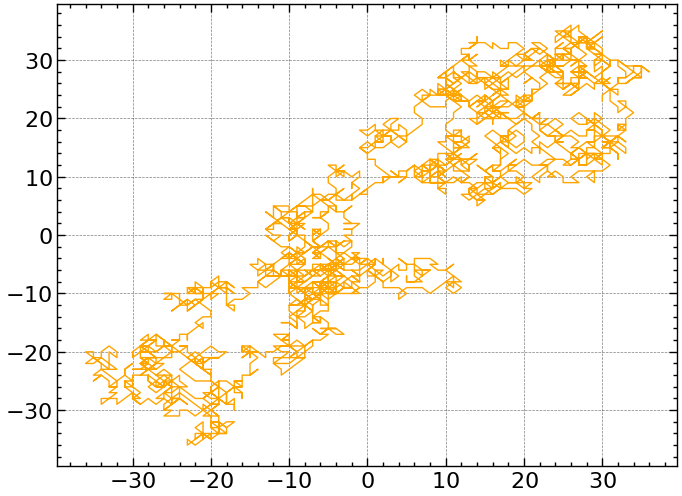

In [48]:
#| label: fig-randow-walk-2d 
#| fig-cap: "Двовимірний фазовий портрет випадкового блукання"

nk.complexity_attractor(embedded=nk.complexity_embedding(signal_random_walk, dimension=2, delay=100), 
                        alpha=1, 
                        color="orange"); 

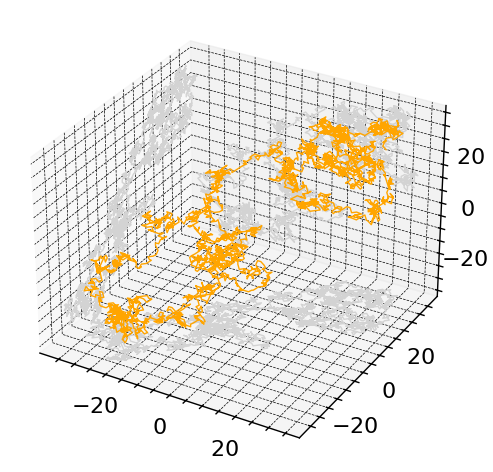

In [49]:
#| label: fig-randow-walk-3d
#| fig-cap: "Тривимірний фазовий портрет випадкового блукання"

nk.complexity_attractor(nk.complexity_embedding(signal_random_walk, dimension=3, delay=100), 
                        alpha=1, 
                        color="orange");

In [9]:
signal_ornstein = nk.complexity_simulate(duration=30, 
                                        sampling_rate=100, 
                                        method="ornstein") # симуляція системи Орнштайна

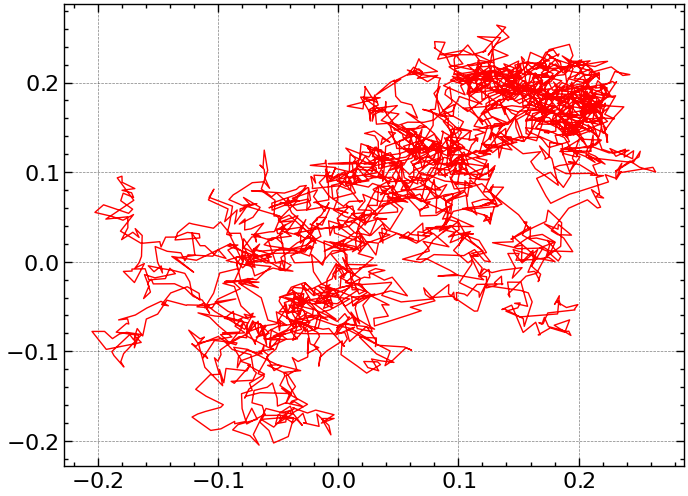

In [10]:
#| label: fig-ornstein-2d
#| fig-cap: "Двовимірний фазовий портрет системи Орнштайна"

nk.complexity_attractor(nk.complexity_embedding(signal_ornstein, dimension=2, delay=100), 
                        alpha=1, 
                        color="red"); 

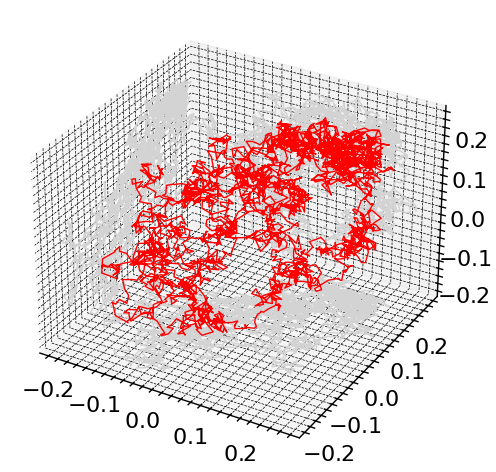

In [11]:
#| label: fig-ornstein-3d
#| fig-cap: "Двовимірний фазовий портрет системи Орнштайна"

nk.complexity_attractor(nk.complexity_embedding(signal_ornstein, dimension=3, delay=100), 
                        alpha=1, 
                        color="red"); 

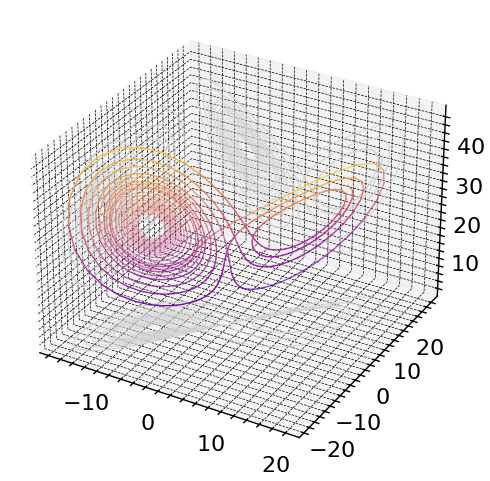

In [12]:
#| label: fig-lorenz-3d
#| fig-cap: "Тривимірний фазовий портрет атрактора Лоренца"

nk.complexity_attractor(color = "last_dim", alpha="time", duration=1);

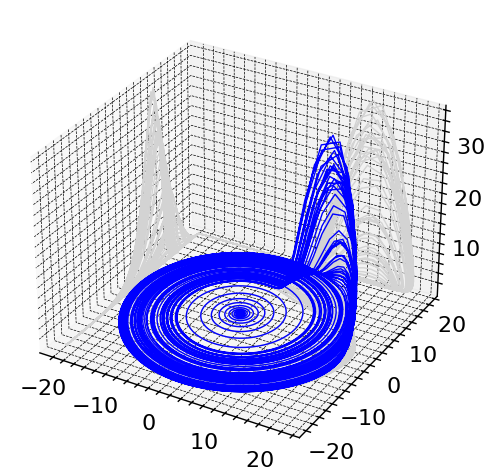

In [13]:
#| label: fig-rossler-3d
#| fig-cap: "Тривимірний фазовий портрет атрактора Рьосслера"

nk.complexity_attractor("rossler", color = "blue", alpha=1, sampling_rate=5000);

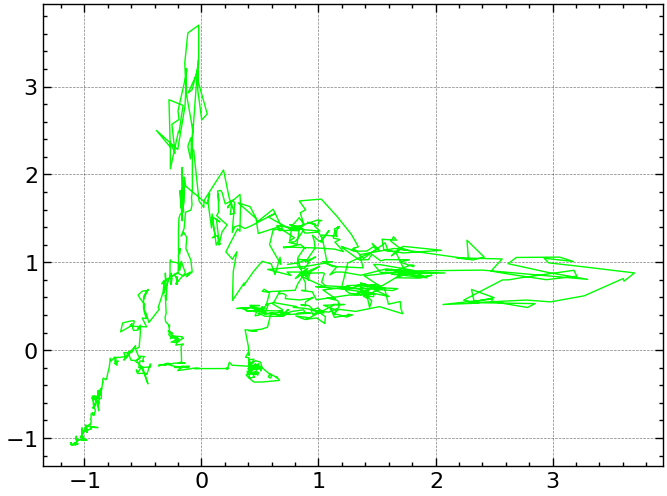

In [14]:
#| label: fig-btc-2d
#| fig-cap: "Двовимірний фазовий портрет вихідних значень досліджуваного ряду Біткоїна"

nk.complexity_attractor(nk.complexity_embedding(for_rec, dimension=2, delay=100), 
                        alpha=1, 
                        color="lime"); 

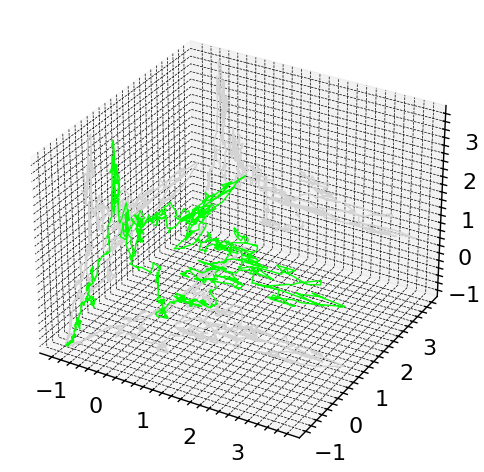

In [15]:
#| label: fig-btc-3d
#| fig-cap: "Тривимірний фазовий портрет вихідних значень досліджуваного ряду Біткоїна"

nk.complexity_attractor(nk.complexity_embedding(for_rec, dimension=3, delay=100), 
                        alpha=1, 
                        color="lime"); 

У зазначених вище прикладах прикладах ми обирали параметри $m$ і $\tau$ згідно нашим власним міркуванням. Але, як правило, при виконанні серйозного дослідження, що матиме прикладне застосування, лише власних переконань буває недостатньо. У нашому випадку бажано було б, щоб зазначені параметри обирались автоматично, опираючись на конкретну статистичну процедуру. Бібліотека `neurokit2` представляє функціонал для автоматичного підбору параметрів розмірності та часової затримки. Коротко їх опишемо. 

### Автоматизований підбір параметра часової затримки, $\tau$

Часова затримка (*Tau* $\tau$ також відома як *Lag*) є одним з двох критичних параметрів, що беруть участь у процедурі реконструкції фазового простору. Він відповідає затримці у відліках між вихідним сигналом і його затриманою версією (версіями). Іншими словами, скільки відліків ми розглядаємо між певним станом сигналу та його найближчим минулим станом.

Якщо $\tau$ менше оптимального теоретичного значення, послідовні координати стану системи корельовані і атрактор недостатньо розгорнутий. І навпаки, коли $\tau$ більше, ніж повинно бути, послідовні координати майже незалежні, що призводить до некорельованої та неструктурованої хмари точок.

Вибір параметрів *затримки* та *розмірності* представляє нетривіальну задачу. Один з підходів полягає у їх (напів)незалежному виборі (оскільки вибір розмірності часто вимагає затримки) за допомогою функцій `complexity_delay()` та `complexity_dimension()`. Однак, існують методи спільного оцінювання, які намагаються знайти оптимальну затримку та розмірність одночасно.

Зауважте також, що деякі автори (наприклад, Розенштейн, 1994) пропонують спочатку визначити оптимальну розмірність вбудовування, а потім розглядати оптимальне значення затримки як оптимальну затримку між першою та останньою координатами затримки (іншими словами, фактична затримка має дорівнювати оптимальній затримці, поділеній на оптимальну розмірність вбудовування мінус 1).

Декілька авторів запропонували різні методи для вибору затримки:

- **Фрейзер і Свінні (1986)** пропонують використовувати перший локальний мінімум взаємної інформації між затриманим і незатриманим часовими рядами, ефективно визначаючи значення $\tau$, для якого вони діляться найменшою інформацією (і де атрактор є найменш надлишковим). На відміну від автокореляції, взаємна інформація враховує також нелінійні кореляції.
- **Тейлер (1990)** запропонував вибирати таке значення $\tau$, при якому автокореляція між сигналом та його зміщенною версією при $\tau$ вперше перетинає значення $1/\exp$. Методи, що базуються на автокореляції, мають перевагу в короткому часі обчислень, коли вони обчислюються за допомогою алгоритму швидкого перетворення Фур'є (fast Fourier transform, FFT).
- **Касдаглі (1991)** пропонує замість цього брати перший нульовий перетин автокореляції.
- **Розенштейн (1993)** пропонує апроксимувати точку, де функція автокореляцій падає до $\left( 1-1/\exp \right)$ від свого максимального значення.
- **Розенштейн (1994)** пропонує наближатися до точки, близької до 40% нахилу середнього зміщення від діагоналі.
- **Кім (1999)** пропонує оцінювати Tau за допомогою кореляційного інтегралу, який називається C-C методом, і який, як виявилося, узгоджується з результатами, отриманими за допомогою методу взаємної інформації. Цей метод використовує статистику в реконструйованому фазовому просторі, а не аналізує часову еволюцію ряду. Однак час обчислень для цього методу значно довший через необхідність порівнювати кожну унікальну пару парних векторів у реконструйованому сигналі на кожну затримку.
- **Лайл (2021)** описує "Реконструкцію симетричного проекційного атрактора" (Symmetric Projection Attractor Reconstruction, SPAR), де $1/3$ від домінуючої частоти (тобто довжини середнього "циклу") може бути підходящим значенням для приблизно періодичних даних, і робить атрактор чутливим до морфологічних змін. Див. також [доповідь Астона](https://youtu.be/GGrOJtcTcHA?t=730). Цей метод також є найшвидшим, але може не підходити для аперіодичних сигналів. Аргумент `algorithm` (за замовчуванням `"fft"`) передається до аргументу `method` методу [`signal_psd()`](https://neuropsychology.github.io/NeuroKit/functions/signal.html#signal-psd).

Можна також зазначити наступний метод для об'єднаного підбору параметрів затримки та розмірності:

- **Гаутама (2003)** зазначає, що на практиці часто використовують фіксовану часову затримку і відповідно регулюють розмірність вбудовування. Оскільки це може призвести до великих значень $m$ (а отже, до вкладених даних великого розміру) і, відповідно, до повільної обробки, вони описують метод оптимізації для спільного визначення $m$ і $\tau$ на основі показника **entropy ratio**.

Розглянемо оптимальні значення розмірності та затримки для часового сигналу Біткоїна:

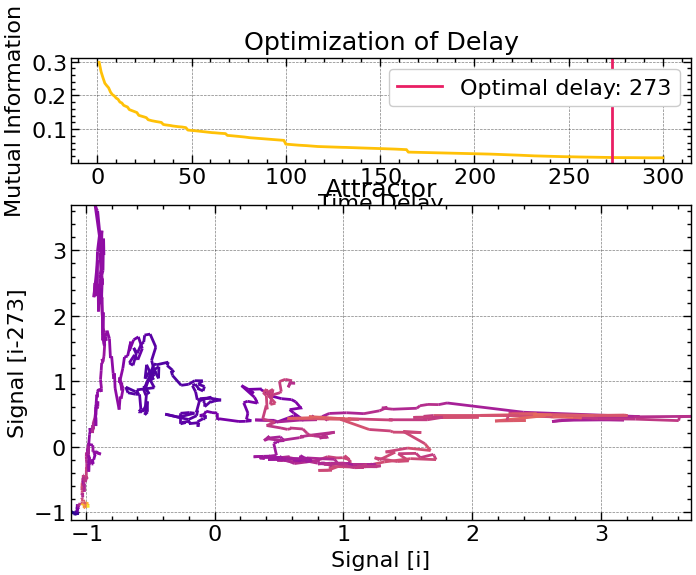

In [16]:
#| label: fig-btc-delay-fraser1986
#| fig-cap: "Оптимальне значення часової затримки на основі методу Фрейзера і Свінні
#|           для часового ряду Біткоїна"


delay, parameters = nk.complexity_delay(for_rec, 
                                        delay_max=300, show=True,
                                        method="fraser1986")


@fig-btc-delay-fraser1986 показує, що перший локальний мінімум взаємної інформації для стандартизованих вихідних значень Біткоїна знаходиться на 273 лагу. Для візуального огляду реконструйованого атрактора це значення, можливо, є найбільш адекватним. Але використовуючи настільки велику часову затримку, ми втрачаємо доволі багато проміжних значень, що також можуть містити досить важливу приховану інформацію для кількісних розрахунків. 

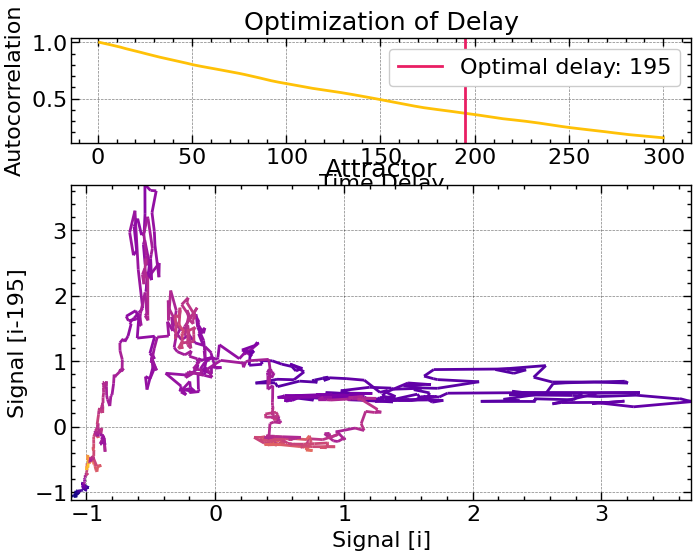

In [17]:
#| label: fig-btc-delay-theiler
#| fig-cap: "Оптимальне значення часової затримки на основі методу Тейлера
#|           для часового ряду Біткоїна"


delay, parameters = nk.complexity_delay(for_rec, 
                                        delay_max=300, show=True,
                                        method="theiler1990")


@fig-btc-delay-theiler демонструє, що автокореляція між стандартизованих вихідним сигналом Біткоїна та його зміщенною версією при $\tau=195$ вперше перетинає значення $1/\exp$. Бачимо, що дане значення затримки є трохи меншим за те, що було отримано до цього, але суті це не змінює. Також бачимо, що між реконструйованими атракторами для $\tau=195$ та $\tau=273$ немає кардинальної візуальної різниці. 

In [18]:
#| output: false
delay, parameters = nk.complexity_delay(for_rec, 
                                        delay_max=500, show=True,
                                        method="casdagli1991")

delay


c:\Users\Andrii\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_delay.py:305: NeuroKitWarning: No optimal time delay is found. Nan is returned. Consider using a higher `delay_max`.
  warn(


nan

Як можна бачити по прикладу вище, не всі методи надають адекватну оцінку розмірності нашого сигналу. Спробуємо привести вихідні значення Біткоїна до прибутковостей та повторити процедуру Касдаглі ще раз.  

In [19]:
ret_type = 4 
ret = transformation(signal, ret_type)

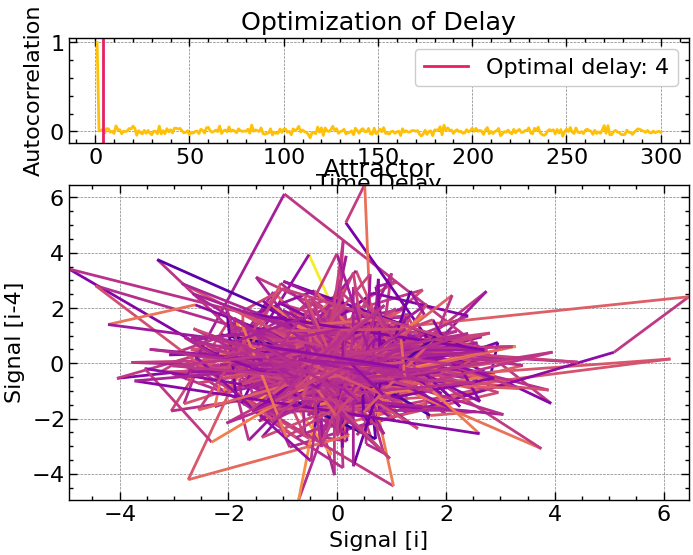

In [20]:
#| label: fig-btc-delay-casdagli1991
#| fig-cap: "Оптимальне значення часової затримки на основі методу Касдаглі
#|           для прибутковостей Біткоїна"

delay, parameters = nk.complexity_delay(ret, 
                                        delay_max=300, show=True,
                                        method="casdagli1991")


Цього разу нам вдалося досягти оптимального результату, але приклад вище демонструє, що кожна процедура має свої виключення. @fig-btc-delay-casdagli1991 показує, що значення прибутковостей Біткоїна характеризуються певними кореляціями лише на перших 4-ох лагах. Подальші часові зміщення роблять значення прибутковостей незалежними один від одного.

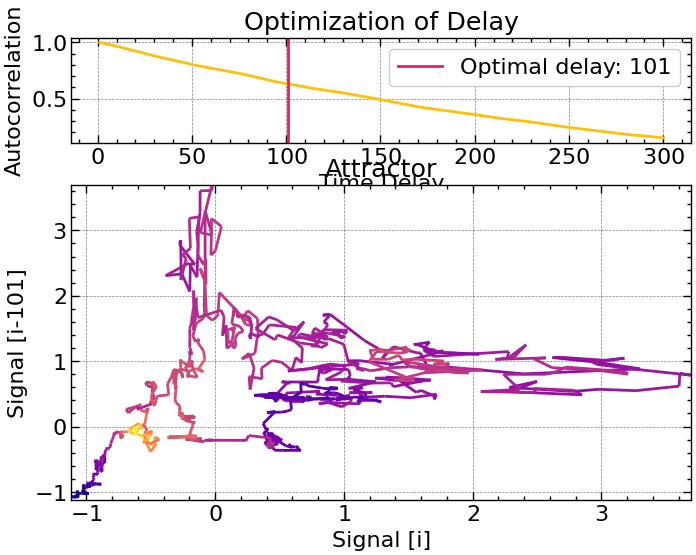

In [21]:
#| label: fig-btc-delay-rosenstein1993
#| fig-cap: "Оптимальне значення часової затримки на основі методу Розенштайна (1993)
#|           для часового ряду Біткоїна"

delay, parameters = nk.complexity_delay(for_rec, 
                                        delay_max=300, show=True,
                                        method="rosenstein1993")

@fig-btc-delay-rosenstein1993 демонструє, що при $\tau=101$ функція автокореляцій перетинає значення $\left( 1-1/\exp \right)$. При цьому видно, що навіть для такого лагу зберігається значна частка кореляцій між стандартизованими вихідними значеннями Біткоїна. 

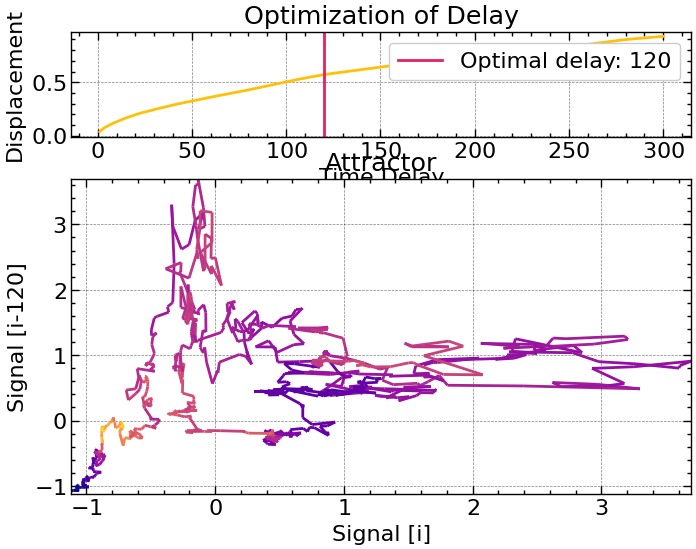

In [22]:
#| label: fig-btc-delay-rosenstein1994
#| fig-cap: "Оптимальне значення часової затримки на основі методу Розенштайна (1994)
#|           для часового ряду Біткоїна"

delay, parameters = nk.complexity_delay(for_rec, 
                                        delay_max=300, show=True,
                                        method="rosenstein1994")

Рисунок вище показує, що при $\tau=120$ зміщення реконструйованих траєкторій від їх оригінального положення на лінії ідентичності зберігає найбільшу кількість інформації стосовно атрактора стандартизованих значень Біткоїна. 

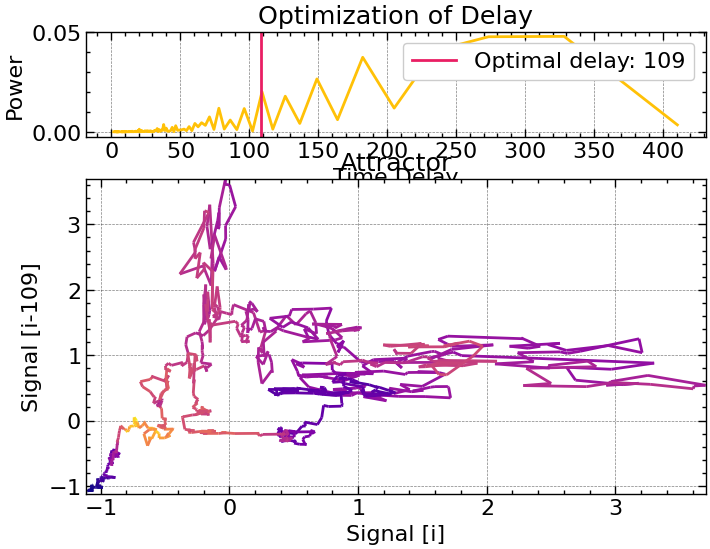

In [23]:
#| label: fig-btc-delay-lyle2021
#| fig-cap: "Оптимальне значення часової затримки на основі методу Лайла
#|           для часового ряду Біткоїна"

delay, parameters = nk.complexity_delay(for_rec, 
                                        delay_max=300, show=True,
                                        method="lyle2021")

Згідно представленого вище результату найбільш значущі частоти, отримані за допомогою перетворення Фур'є, зберігаються при $\tau=109$. 

Тепер подивимось як це виглядатиме для об'єднаного підбору параметрів

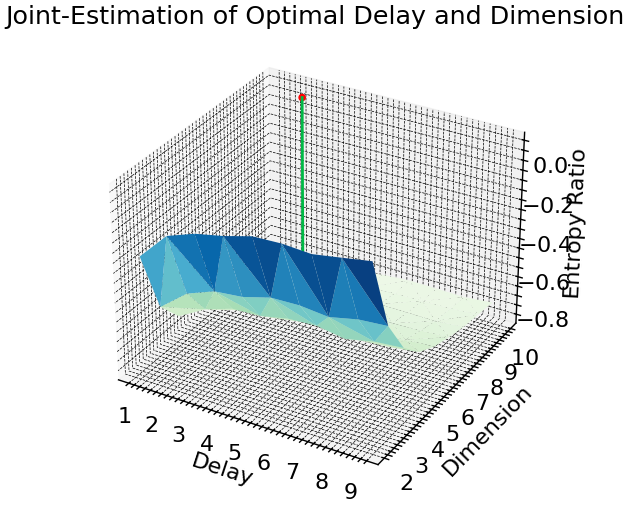

In [24]:
#| label: fig-btc-delay-gautama2003
#| fig-cap: "Оптимальне значення розмірності та затримки на основі 
#| методу Гаутами для часового ряду Біткоїна"

delay, parameters = nk.complexity_delay(for_rec,
    delay_max=np.arange(1, 10, 1), # діапазон значень затримки
    dimension_max=10,              # максимальна розмірність вкладень
    method="gautama2003",
    surrogate_n=5,                 # Кількість сурогатних сигналів 
                                   # для генерації
    surrogate_method="random",     # Спосіб генерації сигналів
    show=True)
 

In [25]:
dimension = parameters["Dimension"]
dimension

10

Оскільки представлена вище процедура є доволі громіздкою в плані обчислювальних потужностей, ми обрали діапазон $\tau$ в межах від 1 до 10. Видно, що при $\tau$ близької до 3 оптимальне значення розмірності атрактора дорівнює 10. Можливо, при значеннях $\tau$ близьких до 100 або 200, ми могли б отримати зовсім інше значення розмірності, але це потребує додаткових експериментів. 

### Автоматизований підбір параметра розмірності вкладень, $m$

За дану процедуру відповідає метод `complexity dimension()`. Її синтаксис виглядає наступним чином:

**`complexity_dimension(signal, delay=1, dimension_max=20, method='afnn', show=False, **kwargs)`**

Хоча зазвичай використовують $m=2$ або $m=3$, але різні автори пропонують наступні процедури підбору:

- **Кореляційна розмірність (Correlation Dimension, CD)**: Одним з перших методів оцінки оптимального $m$ був розрахунок кореляційної розмірності для вкладень різного розміру і пошук насичення (тобто плато) в її значенні при збільшенні розміру векторів. Одне з обмежень полягає в тому, що насичення буде також мати місце, коли даних недостатньо для адекватного заповнення простору високої розмірності (зауважте, що в загальному випадку не рекомендується мати настільки великі вкладення, оскільки це значно скорочує довжину сигналу).
- **Найближчі хибні сусіди (False Nearest Neighbour, FNN)**: Метод, запропонований Кеннелом та ін., базується на припущенні, що дві точки, які є близькими одна до одної в достатній розмірності вбудовування, повинні залишатися близькими при збільшенні розмірності. Алгоритм перевіряє сусідів при збільшенні розмірності вкладень, поки не знайде лише незначну кількість хибних сусідів при переході від розмірності $m$ до $m+1$. Це відповідає найнижчій розмірності вкладення, яка, як передбачається, дає розгорнуту реконструкцію просторово-часового стану. Цей метод може не спрацювати в зашумлених сигналах через марну спробу розгорнути шум (а в чисто випадкових сигналах кількість хибних сусідів суттєво не зменшується зі збільшенням $m$). На рисунку нижче показано, як проекції на простори більшої розмірності можна використовувати для виявлення хибних найближчих сусідів. Наприклад, червона та жовта точки є сусідами в одновимірному просторі, але не в двовимірному.

![](Images\lab_2\douglas2022b.png){width=30% fig-align="center" fig-alt="Проєкція траєкторій до різних розмірностей"}

- **Середні хибні сусіди (Average False Neighbors, AFN)**: Ця модифікація методу FNN, розроблена Сао (1997), усуває один з його основних недоліків --- необхідність евристичного вибору порогових значень $r$. Метод використовує максимальну евклідову відстань для представлення найближчих сусідів і усереднює всі відношення відстані в $m+1$ розмірності до розмірності $m$ і визначає *E1* та *E2* як параметри. Оптимальна розмірність відповідає досягається тоді, коли *E1* перестає змінюватися (досягає плато). *E1* досягає плато при розмірності *d0*, якщо сигнал надходить від атрактора. Тоді *d0*+1* є оптимальною мінімальною розмірністю вкладення. *E2* є корисною величиною для того, щоб відрізнити детерміновані сигнали від стохастичних. Константа *E2*, що близька до 1 для будь-якої розмірності вкладень $d$, вказує на випадковість даних, оскільки майбутні значення не залежать від минулих значень.

**Параметри**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень.
- **delay** (*int*) --- часова затримка у відліках. Для вибору оптимального значення цього параметра ми ще скористаємось методом `complexity_delay()`.
- **dimension_max** (*int*) --- максимальний розмір вкладення для тестування.
- **method** (*str*) --- Може бути `"afn"` (середні хибні сусіди), `"fnn"` (найближчий хибний сусід) або `"cd"` (кореляційна розмірність).
- **show** (*bool*) --- Візуалізувати результат.
- **kwargs** --- інші аргументи, такі як $R=10.0$ або $A=2.0$ (відносне та абсолютне граничне значення, тільки для методу `"fnn"`).

**Повертає**

- **dimension** (*int*) --- оптимальна розмірність вкладень.
- **parameters** (*dict*) --- словник python, що містить додаткову інформацію про параметри, які використовуються для обчислення оптимальної розмірності.

Спробуємо отримати оптимальне значення розмірності згідно зазначених процедур. В якості часової затримки можна взять $\tau=100$. Приблизно таке значення спостерігалося для кожної процедури. 

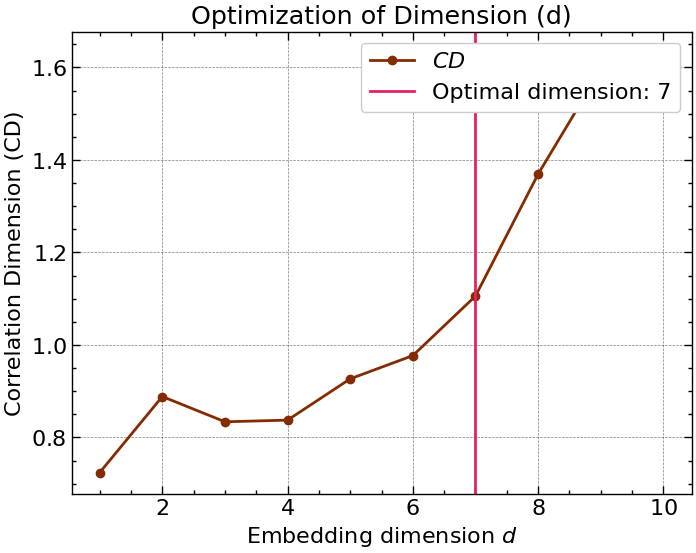

In [26]:
#| label: fig-btc-dim-cd
#| fig-cap: "Оптимальне значення розмірності на основі 
#| кореляційної розмірності для часового ряду Біткоїна"

optimal_dimension, info = nk.complexity_dimension(for_rec,
                                                  delay=100,
                                                  dimension_max=10,
                                                  method='cd',
                                                  show=True)

@fig-btc-dim-cd представляє, що оптимальна розмірність вкладень при якій досягається найбільш інформативна репрезентація фазового простору дорівнює 7.  

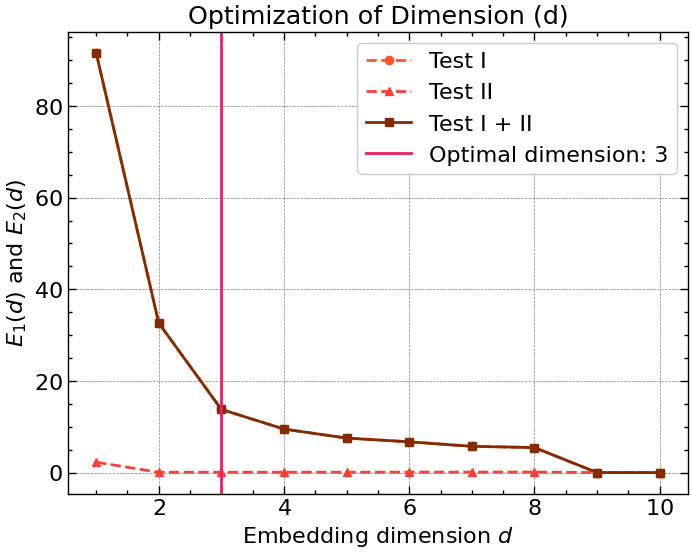

In [27]:
#| label: fig-btc-dim-fnn
#| fig-cap: "Оптимальне значення розмірності на основі 
#| найближчих хибних сусідів для часового ряду Біткоїна"

optimal_dimension, info = nk.complexity_dimension(for_rec,
                                                  delay=100,
                                                  dimension_max=10,
                                                  method='fnn',
                                                  show=True)

З представленого вище рисунку видно, що найнижча розмірності вкладення, яка, як передбачається, дає розгорнуту реконструкцію просторово-часового стану, дорівнює 3. Саме при переході від 3-ох вимірного фазового простору до 4-ох вимірного ми бачимо, що кількість хибних сусідів стає мінімальною і далі не наростає. 

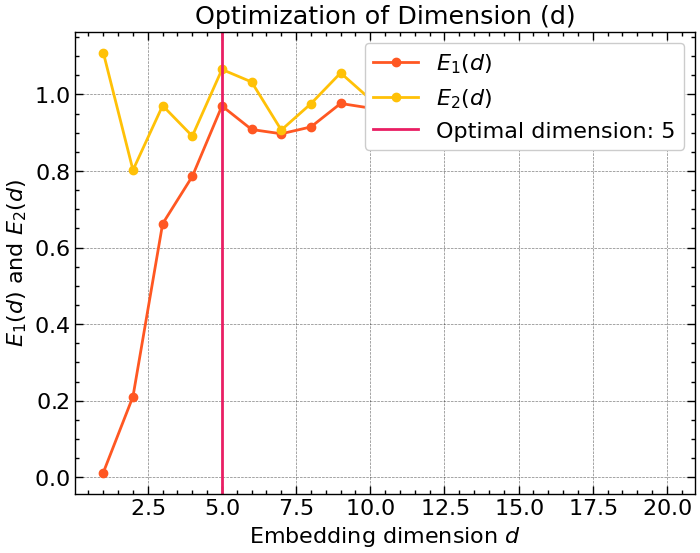

In [28]:
#| label: fig-btc-dim-afnn
#| fig-cap: "Оптимальне значення розмірності на основі 
#| середніх найближчих хибних сусідів для часового ряду Біткоїна"

optimal_dimension, info = nk.complexity_dimension(for_rec,
                                                  delay=20,
                                                  dimension_max=20,
                                                  method='afnn',
                                                  show=True)

Алгоритм середніх хибних сусідів показує, що тут розмірність вкладень $m=5$ є найоптимальнішою. При подальшому наростанні розмірності, атрактор має походити на більш стохастичний, що вказує на втрату всіх кореляцій, що могли бути присутні в досліджуваному сигналі.  

Згідно з представленими вище алгоритмами автоматичного підбору, розмірність вкладень можна обирати в діапазоні значень від 3 до 7. Тепер на основі отриманих результатів приступимо до побудови рекурентної діаграми. 

### Побудова рекурентної матриці

Як вже зазначалося, рекурентний аналіз кількісно визначає кількість і тривалість рекурентних станів динамічної системи, що визначаються на основі реконструйованих траєкторій фазового простору. 

Ми маємо змогу побудувати рекурентну матрицю, використовуючи метод `recurrence_matrix()`. 

Його синтаксис виглядає наступним чином:

**`recurrence_matrix(signal, delay=1, dimension=3, tolerance='default', show=False)`**

**Параметри**

- **signal** (*Union[list, np.ndarray, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень.
- **delay** (*int*) --- затримка в часі. 
- **dimension** (*int*) --- розмірність вкладень, $m$. 
- **tolerance** (*float*) --- радіус $\varepsilon$ багатовимірного околу в межах якого шукаються рекурентні траєкторії (часто позначається як $r$), відстань, на якій дві точки даних вважаються схожими. Якщо `"sd"` (за замовчуванням), буде встановлено значення $0.2 \cdot SD_{signal}$. Емпіричним правилом є встановлення $r$ таким чином, щоб відсоток точок, класифікованих як рекурентні, становив приблизно 2-5%.
- **show** (*bool*) --- візуалізувати рекурентну матрицю.

**Повертає**

- *np.ndarray* --- рекурентну матрицю.
- *np.ndarray* --- матрицю відстаней.

Побудуємо рекурентну матрицю для вихідних значень Біткоїна, його прибутковостей та стандартизованого вихідного ряду. Розмірність $m=4$, часова затримка $\tau=1$, радіус $\varepsilon=0.3$. 

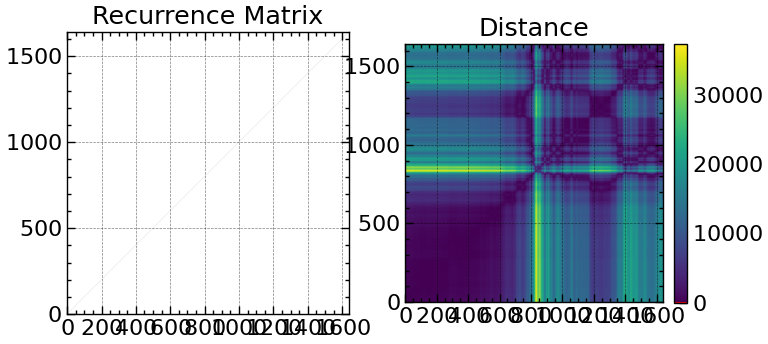

In [29]:
#| label: fig-btc-rec-init
#| fig-cap: "Рекурентна матриця для вихідних значень Біткоїна"

rc, _ = nk.recurrence_matrix(signal, 
                            delay=1, 
                            dimension=4, 
                            tolerance=0.3,
                            show=True)

Як можна бачити з представленого рисунку всі траєкторії залишаються доволі віддаленими один від одного, ніякої рекурентності тут не передбачається. 

Тепер спробуємо подивитися на стандартизовані прибутковості.

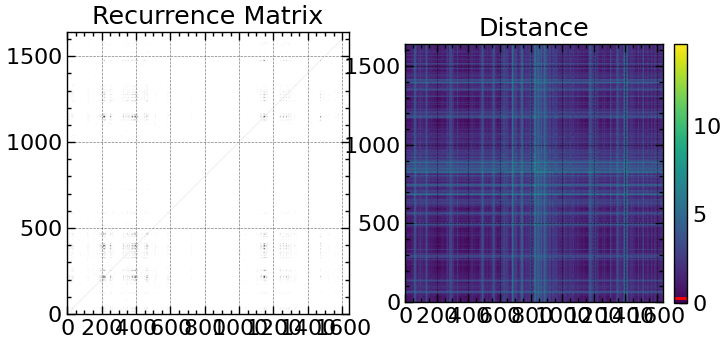

In [30]:
#| label: fig-btc-rec-returns
#| fig-cap: "Рекурентна матриця для стандартизованих прибутковостей Біткоїна"

rc, _ = nk.recurrence_matrix(ret, 
                            delay=1, 
                            dimension=4,
                            tolerance=0.3,
                            show=True)

Тепер можемо бачити, що Біткоїн став характризуватися чорними смугами, що відображають динаміку певних детермінованих процесів. У той же час білі смуги характеризують періоди абсолютно аномальної (непередбачуваної поведінки на даному ринку). Видно, що прибутковості залишаються доволі некорельованими, про що і свідчить переважне домінування саме білих областей.

Спробуємо тепер подивитись на стандартизований вихідний ряд.

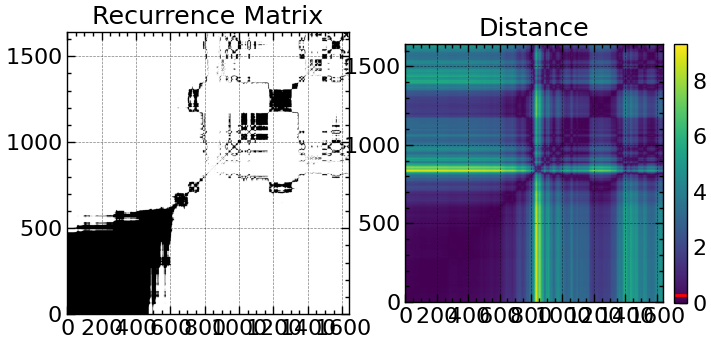

In [31]:
#| label: fig-btc-init-stand
#| fig-cap: "Рекурентна матриця для стандартизованого вихідного ряду Біткоїна"

rc, _ = nk.recurrence_matrix(for_rec, 
                            delay=1, 
                            dimension=4,
                            tolerance=0.3,
                            show=True)

На початку свого існування Біткоїн характеризувався доволі високим ступенем передбачуваності, меншої волатильності власних коливань. Надалі почали предомінувати білі області, але видно, що тепер Біткоїну властива динаміка подібна до броунівсього руху. 

## Завдання для самостійної роботи

1. Отримати індекс часового ряду у викладача
2. Провести дослідження його рекурентних властивостей згідно інструкції
3. Порівняти фазові портрети і рекурентні діаграми для стандартизованого вихідного ряду та прибутковостей. Що спільного між ними і чим вони відрізняються?
4. Зробити висновки